In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("finacial_fraud_clean.csv")

isFraud - "this is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system."

FlaggedFraud -"The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction."

According to kaggle Synthetic Financial Datasets For Fraud Detection
https://www.kaggle.com/ntnu-testimon/paysim1

1048575 rows and 11 columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
step              1048575 non-null int64
type              1048575 non-null int64
nameOrig          1048575 non-null int64
nameDest          1048575 non-null int64
amount            1048575 non-null float64
oldbalanceOrg     1048575 non-null float64
newbalanceOrig    1048575 non-null float64
oldbalanceDest    1048575 non-null float64
newbalanceDest    1048575 non-null float64
isFraud           1048575 non-null int64
isFlaggedFraud    1048575 non-null int64
dtypes: float64(5), int64(6)
memory usage: 88.0 MB


In [4]:
df.shape

(1048575, 11)

This is the summary statistics for the features

In [10]:
df.describe()

,step,type,nameOrig,nameDest,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.713400e+00,5.241599e+05,1.238188e+05,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,1.345007e+00,3.026245e+05,1.237826e+05,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.000000e+00,2.620775e+05,3.629900e+04,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,1.000000e+00,5.241600e+05,7.233300e+04,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,3.000000e+00,7.862395e+05,1.875105e+05,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,4.000000e+00,1.048316e+06,4.496340e+05,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [15]:
df.type.unique()

array([3, 4, 1, 2, 0], dtype=int64)

In [5]:
df.head()

,step,type,nameOrig,nameDest,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,125164,274917,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,361319,286716,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,165236,73550,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,961662,65464,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,567915,138001,11668.14,41554.0,29885.86,0.0,0.0,0,0


Exploratory Data Analysis 

We are seeing that most of the numerical data are right skewed

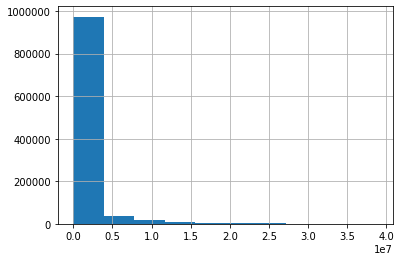

In [7]:
df["oldbalanceOrg"].hist()

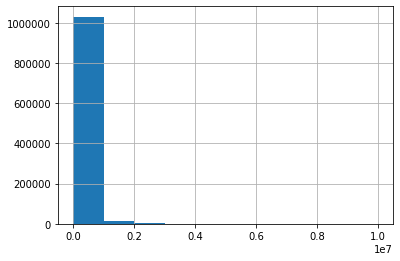

In [6]:
df["amount"].hist()

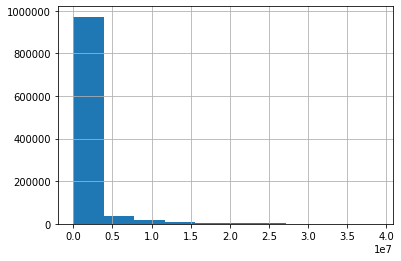

In [8]:
df["newbalanceOrig"].hist()

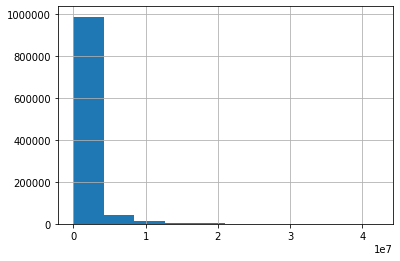

In [9]:
df["oldbalanceDest"].hist()

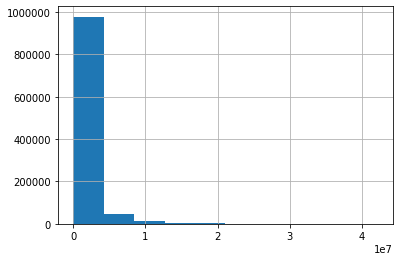

In [10]:
df["newbalanceDest"].hist()

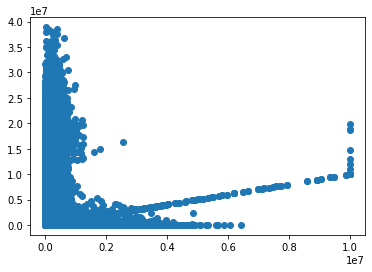

In [11]:
plt.scatter(df["amount"],df["oldbalanceOrg"])

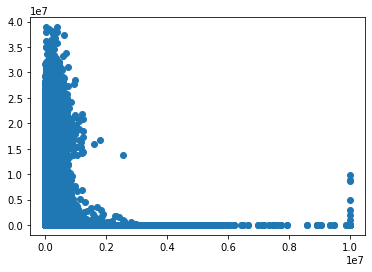

In [18]:
plt.scatter(df["amount"],df["newbalanceOrig"])

We see that there is multicolinearity among oldbalanceOrg and newbalanceOrig. Meaning they are very correlatted.

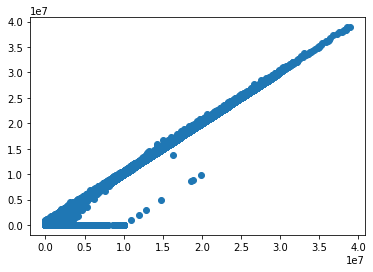

In [19]:
plt.scatter(df["oldbalanceOrg"],df["newbalanceOrig"])

In [20]:
df.columns

Index(['step', 'type', 'nameOrig', 'nameDest', 'amount', 'oldbalanceOrg',
       'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

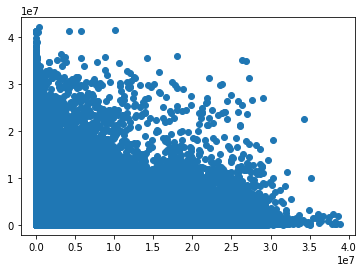

In [23]:
plt.scatter(df['oldbalanceOrg'],df['oldbalanceDest'])

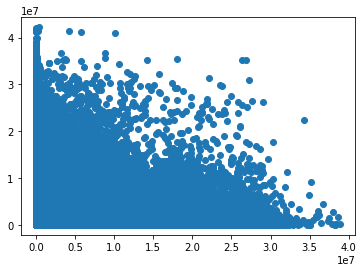

In [25]:
plt.scatter(df['oldbalanceOrg'],df['newbalanceDest'])

Correlation map to see how correlated the features are among each other. We do see a correlation among oldbalanceOrg,newbalanceOrig. Also a correlation among oldbalancedest and newbalancedest.
Lastly there is a negative correlation between type and OldbalanceOrig. Type and newbalanceOrig,oldbalanceOrg.

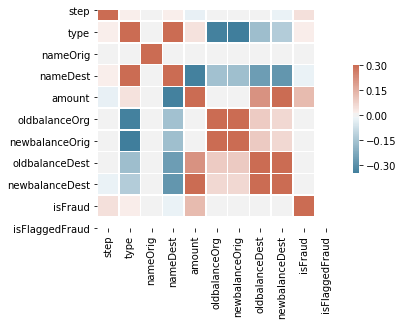

In [27]:
corr = df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
df_corr = df.corr()

Correlation matrix of the features

In [17]:
df_corr

,step,type,nameOrig,nameDest,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.015992,-0.000252,0.015275,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030,NaN
type,0.015992,1.000000,-0.000420,0.586477,0.042118,-0.339142,-0.351602,-0.166134,-0.127108,0.018859,NaN
nameOrig,-0.000252,-0.000420,1.000000,-0.001146,0.001649,0.000102,0.000143,0.001736,0.001873,0.000030,NaN
nameDest,0.015275,0.586477,-0.001146,1.000000,-0.340864,-0.160207,-0.163522,-0.260621,-0.282134,-0.019759,NaN
amount,-0.025996,0.042118,0.001649,-0.340864,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862,NaN
oldbalanceOrg,-0.006780,-0.339142,0.000102,-0.160207,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829,NaN
newbalanceOrig,-0.007180,-0.351602,0.000143,-0.163522,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438,NaN
oldbalanceDest,-0.002251,-0.166134,0.001736,-0.260621,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552,NaN
newbalanceDest,-0.019503,-0.127108,0.001873,-0.282134,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495,NaN
isFraud,0.045030,0.018859,0.000030,-0.019759,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000,NaN


We see that type and nameDest are heavily correlated with each other.

OldbalanceOrg and newbalanceOrig highly correlated(perfect linear relationship)
newbalanceDest and oldbalanceDest highly correlated( almost perfect linear realtionship)
Meaning as one variable increase the other variable increase through a linear rule

The pairing of customer's balance(oldbalanceOrg/newbalanceOrig) has a weak relationship to with recepient's balances(oldbalanceDest/newbalanceDest)


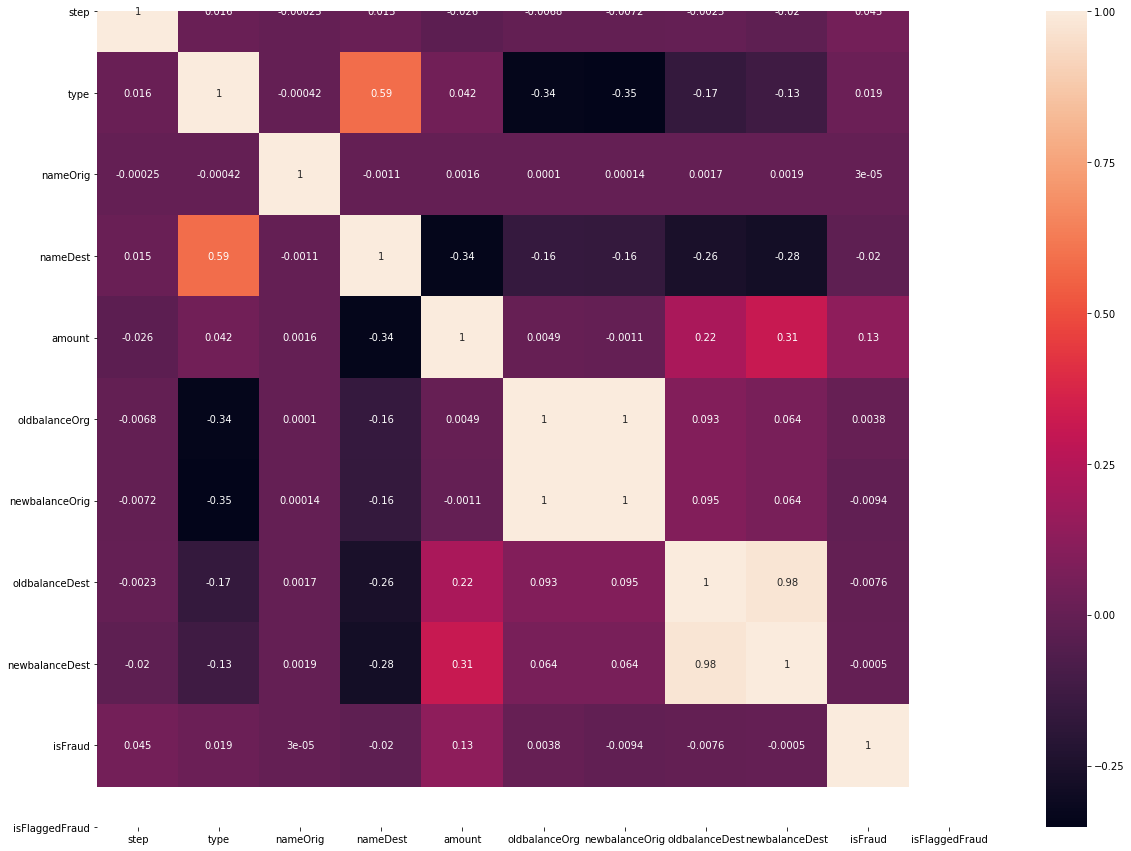

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,15
sns.heatmap(df_corr,annot=True)
plt.show()

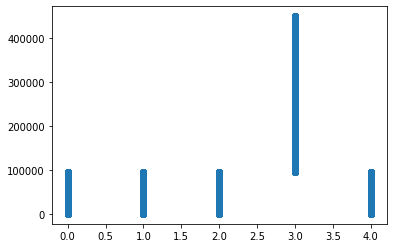

In [6]:
plt.scatter(df["type"],df["nameDest"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E17764B70>,
      dtype=object)

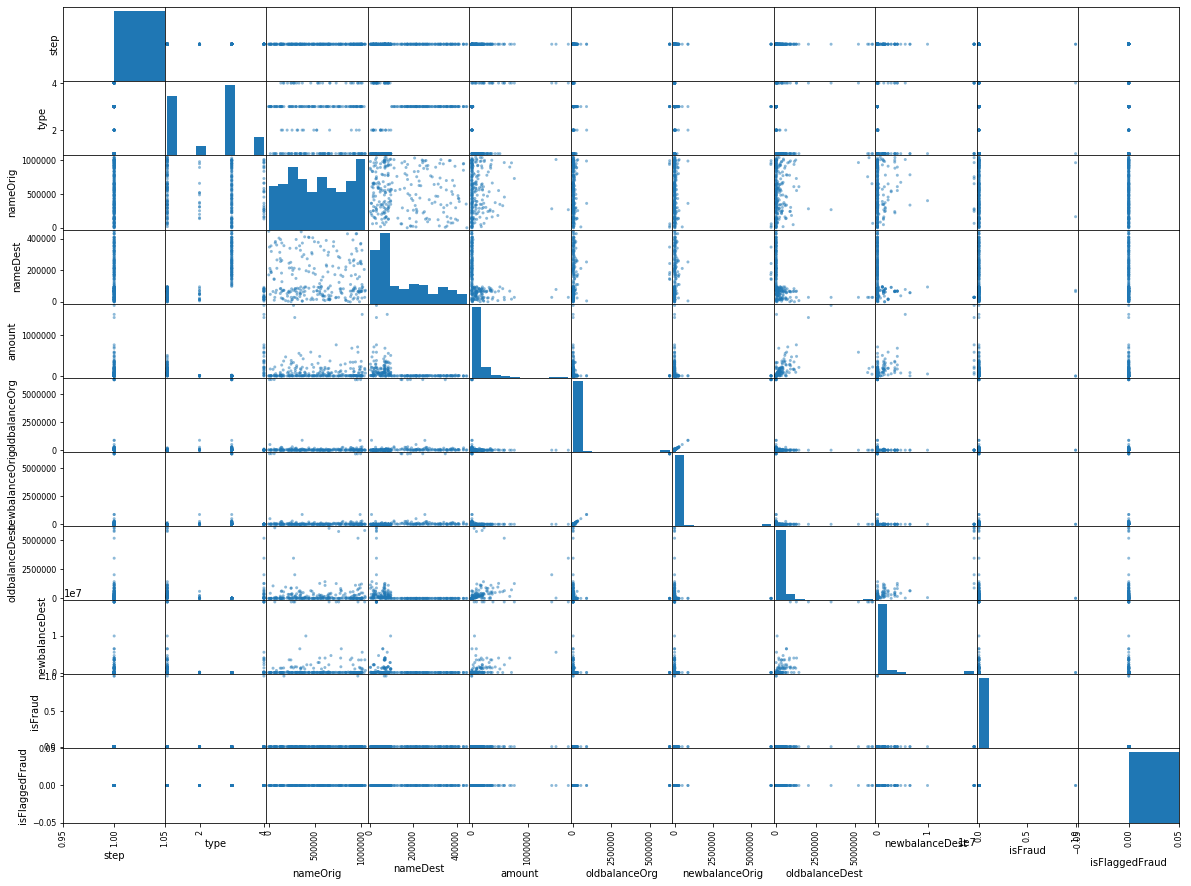

In [6]:
pd.plotting.scatter_matrix(df.iloc[0:250],figsize=(20,15)) # will take a small sample to plot a scatter plot

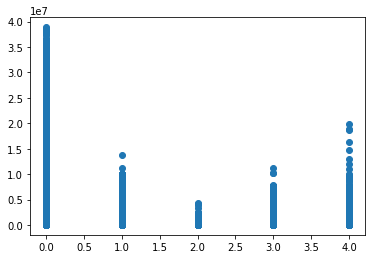

In [3]:
plt.scatter(df["type"],df["oldbalanceOrg"])

In [4]:
df.tail()

,step,type,nameOrig,nameDest,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,1,97392,67716,132557.35,479803.00,347245.65,484329.37,616886.72,0,0
1048571,95,3,517554,388387,9917.36,90545.00,80627.64,0.00,0.00,0,0
1048572,95,3,562208,160789,14140.05,20545.00,6404.95,0.00,0.00,0,0
1048573,95,3,343317,272152,10020.05,90605.00,80584.95,0.00,0.00,0,0
1048574,95,3,143049,390003,11450.03,80584.95,69134.92,0.00,0.00,0,0


1 - fraudlent transaction
0 - non fraudlent transaction

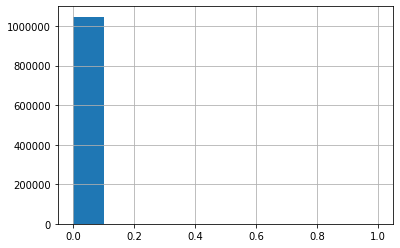

In [5]:
df["isFraud"].hist()

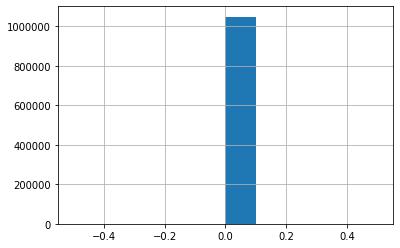

In [6]:
df["isFlaggedFraud"].hist()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
step              1048575 non-null int64
type              1048575 non-null int64
nameOrig          1048575 non-null int64
nameDest          1048575 non-null int64
amount            1048575 non-null float64
oldbalanceOrg     1048575 non-null float64
newbalanceOrig    1048575 non-null float64
oldbalanceDest    1048575 non-null float64
newbalanceDest    1048575 non-null float64
isFraud           1048575 non-null int64
isFlaggedFraud    1048575 non-null int64
dtypes: float64(5), int64(6)
memory usage: 88.0 MB


We see that most of the data points extend pass the third quartile

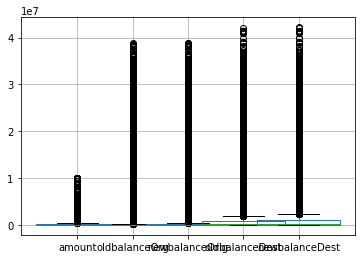

In [14]:
df.boxplot(["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],
          whis=1,widths=1.5)

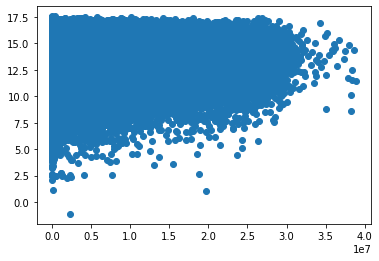

In [17]:
plt.scatter(df["oldbalanceOrg"],np.log(df["newbalanceDest"]))

In [8]:
df[["newbalanceOrig","oldbalanceOrg"]]

,newbalanceOrig,oldbalanceOrg
0,160296.36,170136.00
1,19384.72,21249.00
2,0.00,181.00
3,0.00,181.00
4,29885.86,41554.00
...,...,...
1048570,347245.65,479803.00
1048571,80627.64,90545.00
1048572,6404.95,20545.00
1048573,80584.95,90605.00


In [4]:
df["newbalanceOrig"].describe()

count    1.048575e+06
mean     8.938089e+05
std      3.008271e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.746000e+05
max      3.890000e+07
Name: newbalanceOrig, dtype: float64

In [5]:
df["oldbalanceOrg"].describe()

count    1.048575e+06
mean     8.740095e+05
std      2.971751e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.600200e+04
75%      1.366420e+05
max      3.890000e+07
Name: oldbalanceOrg, dtype: float64

In [6]:
df["oldbalanceDest"].describe()

count    1.048575e+06
mean     9.781600e+05
std      2.296780e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.263772e+05
75%      9.159235e+05
max      4.210000e+07
Name: oldbalanceDest, dtype: float64

In [7]:
df["newbalanceDest"].describe()

count    1.048575e+06
mean     1.114198e+06
std      2.416593e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.182604e+05
75%      1.149808e+06
max      4.220000e+07
Name: newbalanceDest, dtype: float64

oldbalanceorg and newbalanceorg are the balances before and after the transaction respectively
oldbalancedest and newbalancedest are the recepients balances before and after the transaction respectively

From simple observation I see that each feature pairs are not correlated meaning there is not a direct transactional difference between the pairs. It seems that some of the money goes un accounted for which I will contribute to fraud

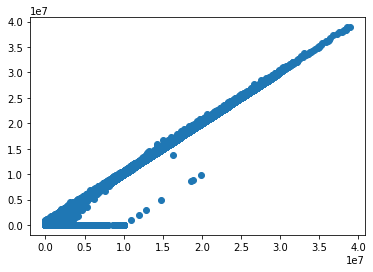

In [9]:
plt.scatter(df["oldbalanceOrg"],df["newbalanceOrig"])

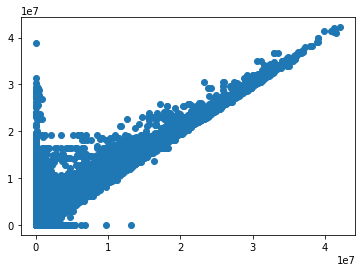

In [10]:
plt.scatter(df["oldbalanceDest"],df["newbalanceDest"])

As we can expect there is collinearity among the feautures but notice that there are outliers and leverage points. I'm going to assume this is a result of fradulent Transactions

In [20]:
fraud = df.loc[df["isFraud"]==1]

We see for all fraudlent transactions that the customers new balance after the transaction is 0. Which is likely the result of all the money being transferred due to fraudlent transactions

In [22]:
fraud.columns

Index(['step', 'type', 'nameOrig', 'nameDest', 'amount', 'oldbalanceOrg',
       'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

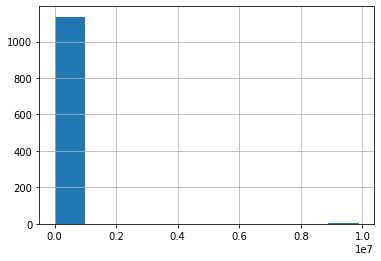

In [24]:
fraud["newbalanceOrig"].hist()

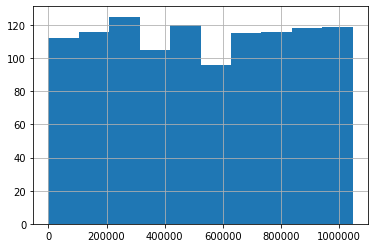

In [25]:
fraud["nameOrig"].hist()

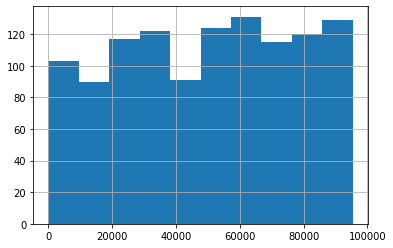

In [26]:
fraud["nameDest"].hist()

In [8]:
import statsmodels.api as sm

I will create regression models for oldbalanceorg,newbalanceorig,oldbalancDest,and newbalanceDest. I will like to see the relation among the pairings

In [16]:
x1 = df["oldbalanceOrg"]
y = df["newbalanceOrig"]

In [17]:
x1 = sm.add_constant(x1)

In [18]:
model = sm.OLS(y,x1)

In [19]:
results = model.fit()

In [22]:
results.params

const            9901.223257
oldbalanceOrg       1.011325
dtype: float64

the linear relationship is newbalanceOrig = 1.011325(oldbalanceorg) + 9901.2232

In [21]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         newbalanceOrig   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.496e+08
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:09:22   Log-Likelihood:            -1.3845e+07
No. Observations:             1048575   AIC:                         2.769e+07
Df Residuals:                 1048573   BIC:                         2.769e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9901.2233    133.631     74.094

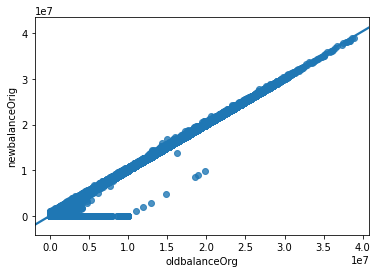

In [5]:
import seaborn as sns

sns.regplot(x='oldbalanceOrg', y='newbalanceOrig', data=df)